## EDA по данным риелторской компании

В файле clients.csv предоставлена информация о клиентах риелторской компании США за один месяц. Вам необходимо как специалисту по Data Science сделать следующее:

Используя данные о выборке, постройте типичный портрет целевого клиента компании (пол, возраст, какой тип квартиры он приобретает, какова площадь в кв. м , каков средний чек, цель покупки, источник лида (погуглите что такое лид в маркетинге, за это отвечает колонка Source).

Таким образом после вашего анализа, я хочу увидеть описание нашего целевого клиента с соответствующими визуализациями. Ожидаю увидеть как минимум 5 графиков с комментариями. Отнеситесь к заданию достойно, представьте, что от Вашего отчета зависит принятие важного решения.

---

**Баллы могут быть снижены** за качество кода - старайтесь чтобы код был максимально лаконичным. Названия переменных (если они используются) должны отражать максимальную ее сущность.

**Комментарии по сдаче практического задания**:
1. Залить в репу на github в папку module_2/descriptive_stats
2. Ссылку на репо отправлять мне на почту alexadevv@gmail.com не позднее дедлайна.
3. Тема письма: Домашнее задание по модулю 2 <Фамилия Имя>
4. После дедлайна, неотправленные на почту задания, оцениваются максимум в 7 баллов.

In [1]:
#### Импортируем библиотеки
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from math import ceil
from tqdm import tqdm



### 1.Получение данных

In [2]:
df = pd.read_csv('clients.csv')
df.head(10)

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,...,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005,11,Apartment,30,743.09,"$ 246,172.68",Sold,C0028,...,1986.0,6.0,21.0,F,USA,California,Home,5,No,Website
1,1029,1,2005,10,Apartment,29,756.21,"$ 246,331.90",Sold,C0027,...,1983.0,2.0,24.0,F,USA,California,Home,5,No,Website
2,2002,2,2007,7,Apartment,2,587.28,"$ 209,280.91",Sold,C0112,...,1985.0,12.0,27.0,M,USA,California,Home,1,Yes,Client
3,2031,2,2007,12,Apartment,31,1604.75,"$ 452,667.01",Sold,C0160,...,1985.0,12.0,27.0,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004,11,Apartment,49,1375.45,"$ 467,083.31",Sold,C0014,...,1979.0,5.0,15.0,F,USA,California,Home,4,No,Agency
5,3011,3,2007,9,Apartment,11,675.19,"$ 203,491.85",Sold,C0125,...,1981.0,12.0,26.0,F,USA,Virginia,Investment,5,No,Client
6,3026,3,2007,9,Apartment,26,670.89,"$ 212,520.83",Sold,C0125,...,1981.0,12.0,26.0,F,USA,Virginia,Investment,5,No,Agency
7,3023,3,2008,1,Apartment,23,720.81,"$ 198,591.85",Sold,C0166,...,1982.0,5.0,27.0,M,USA,California,Home,5,No,Client
8,1031,1,2006,6,Apartment,31,782.25,"$ 265,467.68",Sold,C0034,...,1979.0,6.0,27.0,M,USA,Arizona,Home,2,Yes,Website
9,4023,4,2006,3,Apartment,23,794.52,"$ 235,633.26",Sold,C0170,...,1979.0,12.0,3.0,F,USA,Virginia,Investment,3,Yes,Agency


In [3]:
# смотрим основную информацию о нашем DataFrame которая может показать в каких данных много пропусков и тип данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       195 non-null    int64  
 1   Building                 195 non-null    int64  
 2   Year of sale             195 non-null    int64  
 3   Month of sale            195 non-null    int64  
 4   Type of property         195 non-null    object 
 5   Property number          195 non-null    int64  
 6   Area (ft.)               195 non-null    float64
 7   Price                    195 non-null    object 
 8   Status                   195 non-null    object 
 9   Customer ID              195 non-null    object 
 10  Entity                   195 non-null    object 
 11  Name                     195 non-null    object 
 12  Surname                  195 non-null    object 
 13  Age at time of purchase  178 non-null    float64
 14  Age Interval             1

### 2.Выявление некорректных и пропущенных значений

In [4]:
# посмотрим на NaN	
df.isnull().sum()

ID                          0
Building                    0
Year of sale                0
Month of sale               0
Type of property            0
Property number             0
Area (ft.)                  0
Price                       0
Status                      0
Customer ID                 0
Entity                      0
Name                        0
Surname                     0
Age at time of purchase    17
Age Interval               17
Y                          17
M                          17
D                          17
Gender                     17
Country                     0
State                      14
Purpose                     0
Deal satisfaction           0
Mortgage                    0
Source                      0
dtype: int64

In [5]:
# посмотрим на строки со значениями NaN	
rows_with_nan = df[df.isnull().any(axis=1)]
rows_with_nan

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,...,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
41,1032,1,2005,1,Apartment,32,782.25,"$ 215,410.28",Sold,C0015,...,1969.0,10.0,30.0,F,Belgium,NaN,Home,2,No,Agency
58,2025,2,2007,2,Apartment,25,927.83,"$ 315,733.15",Sold,C0070,...,1967.0,6.0,13.0,F,Russia,NaN,Home,1,No,Agency
64,2005,2,2006,9,Apartment,5,785.48,"$ 257,183.48",Sold,C0047,...,1965.0,1.0,11.0,F,Denmark,NaN,Investment,1,No,Agency
76,3049,3,2007,4,Apartment,49,1283.45,"$ 338,181.18",Sold,C0084,...,1965.0,5.0,12.0,M,Mexico,NaN,Home,3,No,Agency
114,2003,2,2006,12,Apartment,3,927.08,"$ 289,727.99",Sold,C0063,...,1955.0,12.0,2.0,M,Russia,NaN,Investment,3,No,Agency
139,3050,3,2006,11,Apartment,50,977.87,"$ 248,274.31",Sold,C0059,...,1949.0,6.0,22.0,F,Russia,NaN,Home,3,Yes,Agency
146,2019,2,2007,3,Apartment,19,649.80,"$ 177,555.06",Sold,C0079,...,1947.0,5.0,24.0,M,Canada,NaN,Investment,5,No,Website
147,2021,2,2007,4,Apartment,21,785.48,"$ 217,748.48",Sold,C0079,...,1947.0,5.0,24.0,M,Canada,NaN,Investment,5,No,Website
148,2027,2,2007,4,Apartment,27,785.48,"$ 247,739.44",Sold,C0079,...,1947.0,5.0,24.0,M,Canada,NaN,Investment,5,No,Website
149,2052,2,2007,3,Apartment,52,1615.29,"$ 484,458.03",Sold,C0079,...,1947.0,5.0,24.0,M,Canada,NaN,Investment,5,No,Website


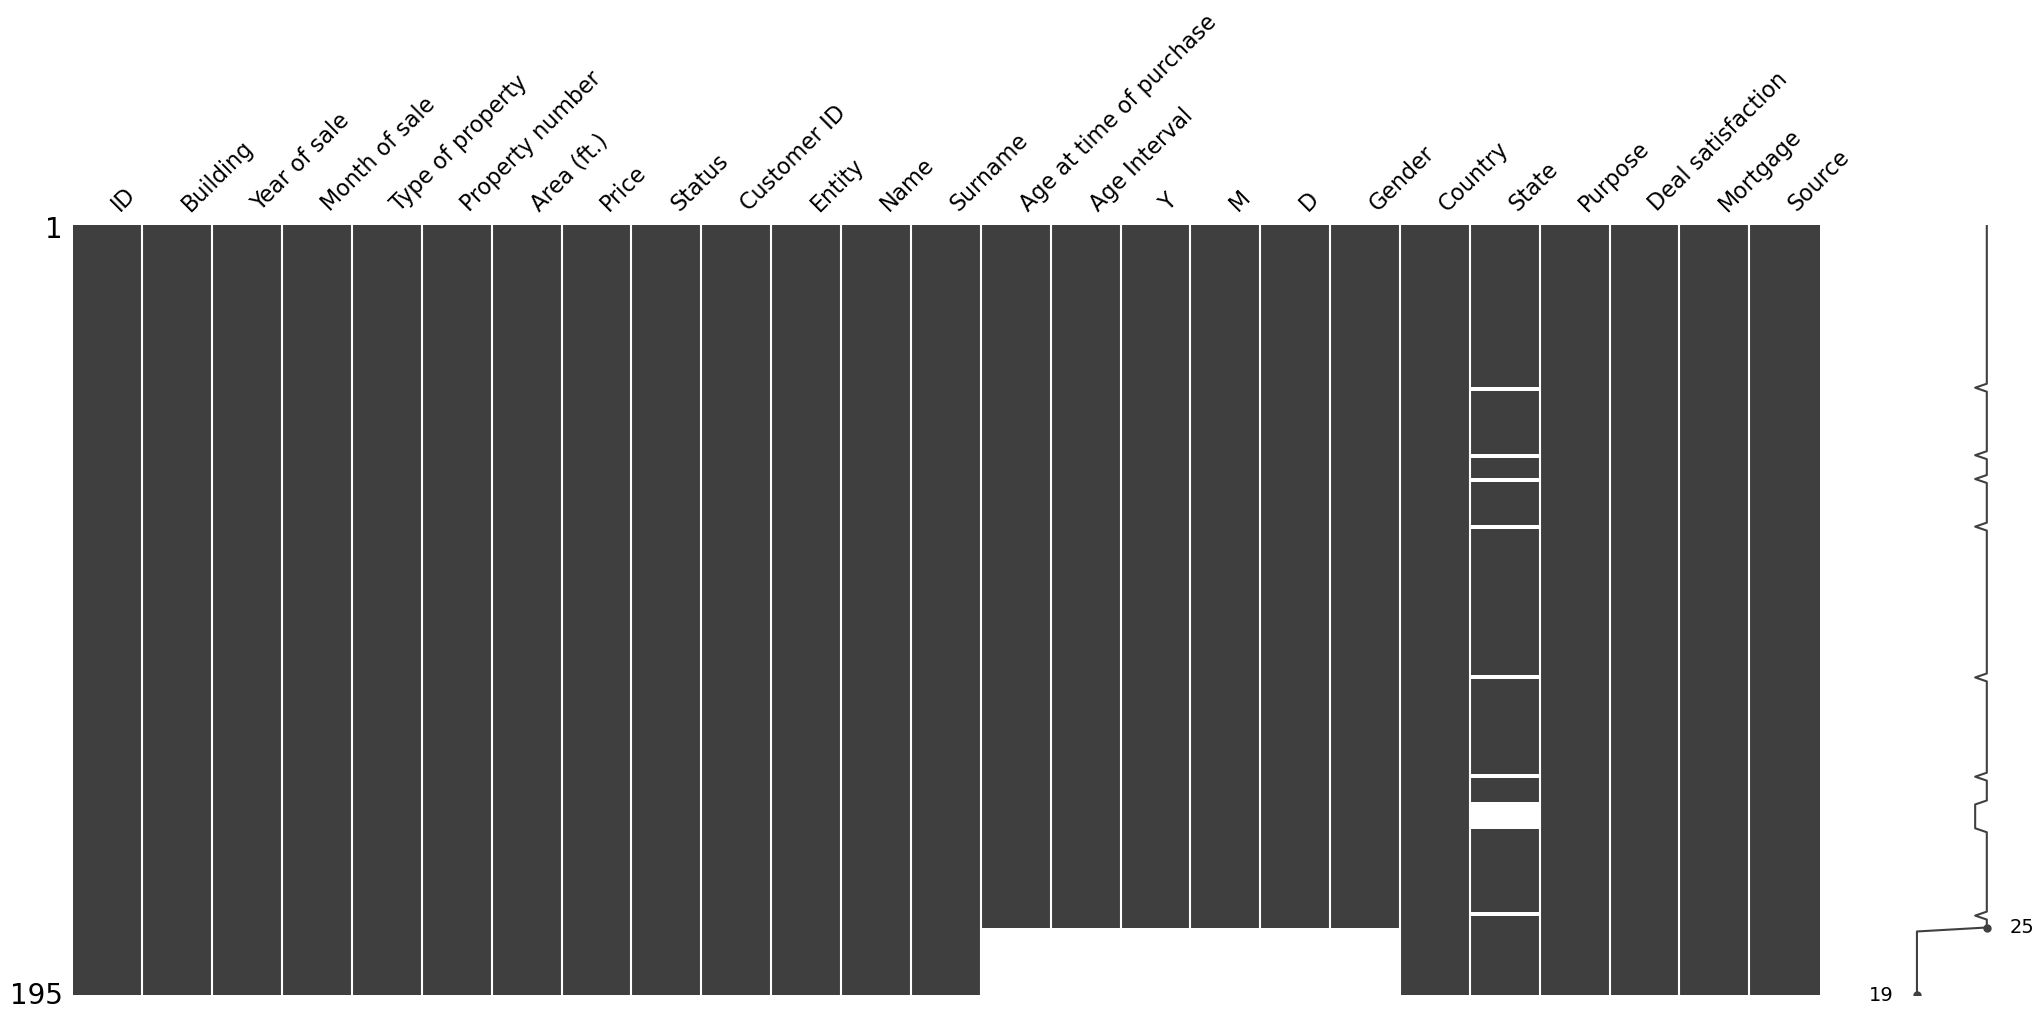

<Figure size 1500x900 with 0 Axes>

In [6]:
# посмотрим спарклайн для выделения строк в наборе данных с самой высокой и самой низкой плотностью пропущенных значений 
import missingno as msno

msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

<Axes: >

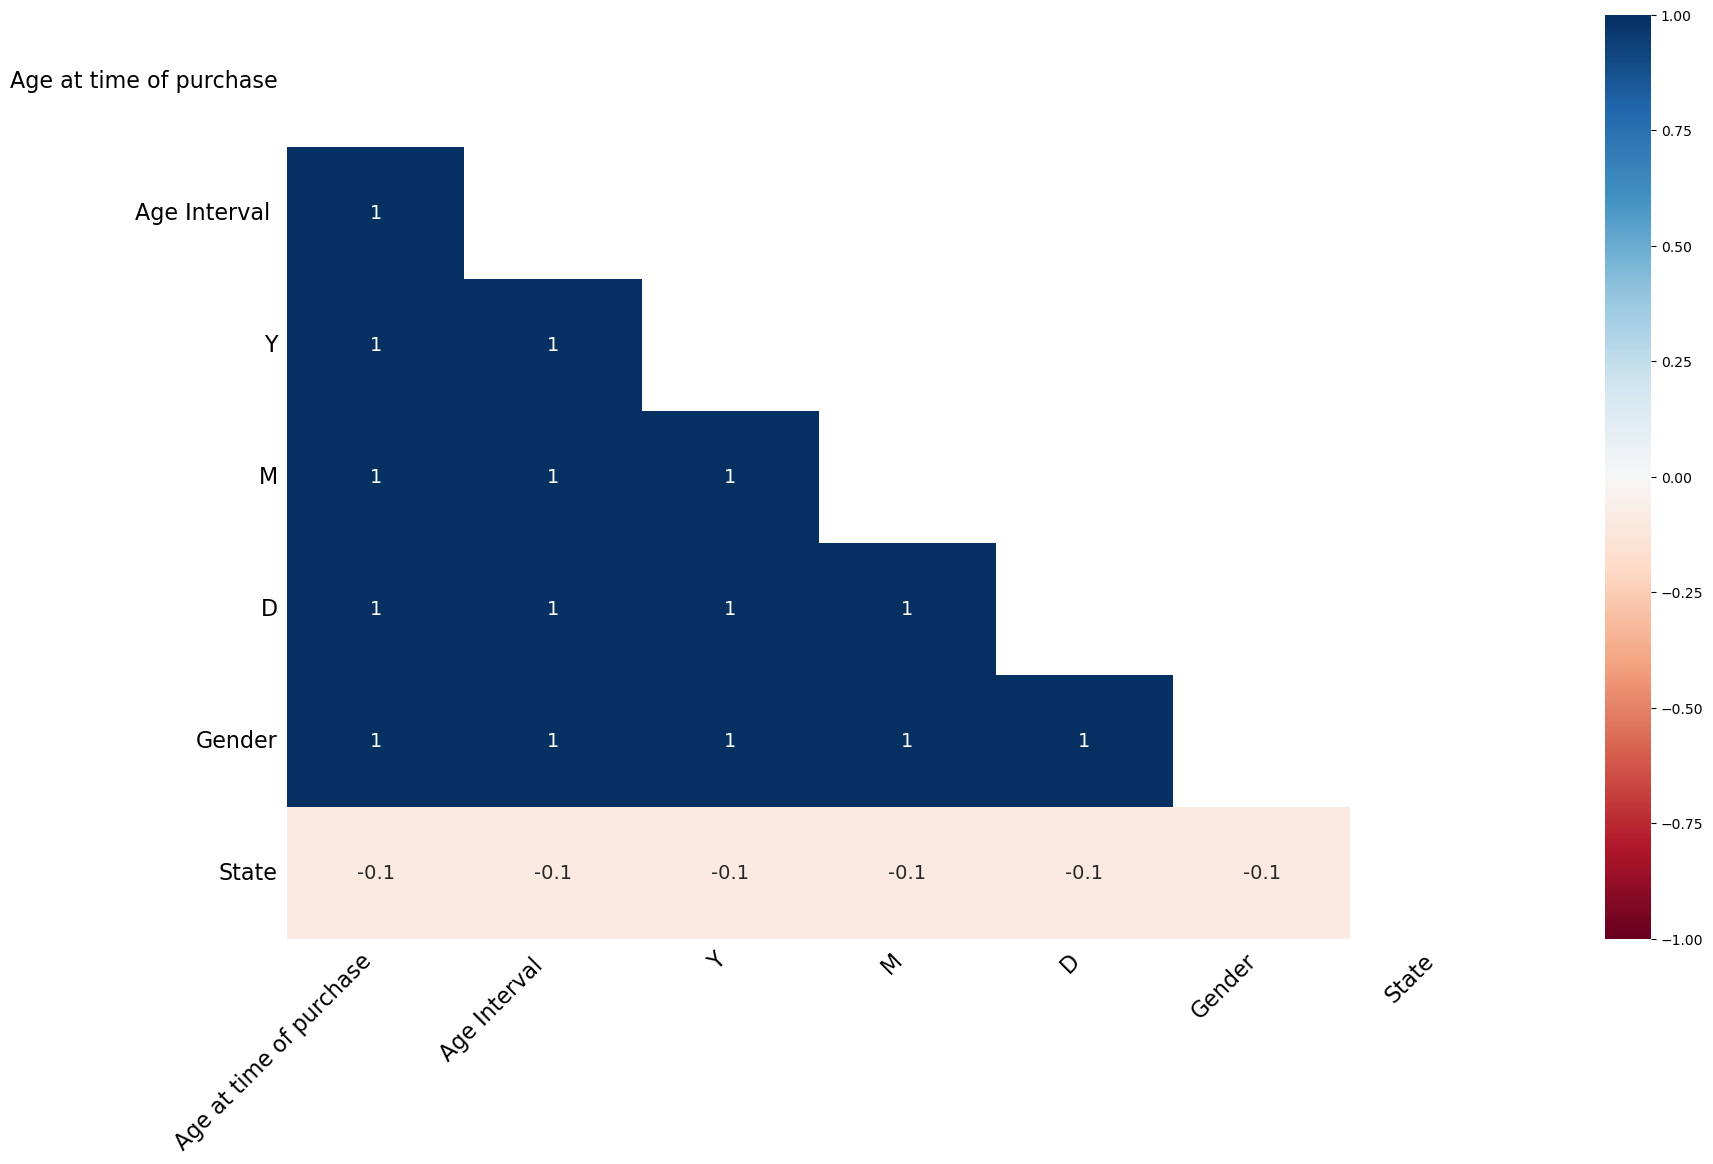

In [7]:
# построим heat map для измерения корреляций между столбцами в наборе данных.
msno.heatmap(df, labels = True)

In [8]:
# создадим функцию для вывода NaN значений в процентах
def get_numerical_summary(df):
    total = df.shape[0]
    missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    missing_percent = {}
    for col in missing_columns:
        null_count = df[col].isnull().sum()
        per = (null_count/total) * 100
        missing_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_percent

In [9]:
# применим созданную выше функцию для определения пропусков в процентном отношении
missing_percent = get_numerical_summary(df)

Age at time of purchase : 17 (8.718%)
Age Interval  : 17 (8.718%)
Y : 17 (8.718%)
M : 17 (8.718%)
D : 17 (8.718%)
Gender : 17 (8.718%)
State : 14 (7.179%)


#### Анализ данных показывает:
1. пропуски значений в колонках Age at time of purchase, Age Interval, Y, M, D связаны с тем, что покупкой недвижимости занимались юридические лица, соответственно данных о возрасте, и датах рождения для юридических лиц не существуют.
2. пропуски значений в колонке State связаны с тем, что покупатели являются иностранцами.

### 3. Обработка некорректных и пропущенных значений

In [10]:
# посмотрим на столбцы в которых пропущены значения либо NaN
df.isnull().sum()

ID                          0
Building                    0
Year of sale                0
Month of sale               0
Type of property            0
Property number             0
Area (ft.)                  0
Price                       0
Status                      0
Customer ID                 0
Entity                      0
Name                        0
Surname                     0
Age at time of purchase    17
Age Interval               17
Y                          17
M                          17
D                          17
Gender                     17
Country                     0
State                      14
Purpose                     0
Deal satisfaction           0
Mortgage                    0
Source                      0
dtype: int64

### Энкодинг пропущенных значений.
с учетом выше приведенного анализа данных заменим пропущенные либо NaN значения на текст либо значение 0 (в зависимости от типов данных)

In [11]:
# создадим функцию по поиску колонок с типом данных object в которых есть пропущенные либо NaN значения, кроме State
cat_missing_cols = [col for col in df.columns if df[col].dtype == 'object' and df[col].isnull().sum() > 0 and col != 'State']
cat_missing_cols

['Age Interval ', 'Gender']

In [12]:
# заменим пропущенные либо NaN значения в колонках Age Interval ', 'Gender' на 'Company'
df[cat_missing_cols] = df[cat_missing_cols].fillna('Company')

In [13]:
# проверим прошли ли замены для 'Age Interval ', 'Gender'
df[cat_missing_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age Interval   195 non-null    object
 1   Gender         195 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


In [14]:
# создадим функцию  для колонки State по поиску значений с типом object и NaN 
cat_missing_cols_state = [col for col in df.columns if df[col].dtype == 'object' and df[col].isnull().sum() > 0 and col == 'State'];
cat_missing_cols_state

['State']

In [15]:
# заменим пропущенные либо NaN значения в колонках 'State' на 'foreigner'
df[cat_missing_cols_state] = df[cat_missing_cols_state].fillna('foreigner')

In [16]:
# проверим прошли ли замены для 'State'
df[cat_missing_cols_state].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   195 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [17]:
# создадим функцию  по поиску пропущенных значений с типом float64
cat_missing_float = [col for col in df.columns if df[col].dtype == 'float64' and df[col].isnull().sum() > 0]
cat_missing_float

['Age at time of purchase', 'Y', 'M', 'D']

In [18]:
# заменим пропущенные либо NaN значения в колонках 'Age at time of purchase', 'Y', 'M', 'D' на 0
df[cat_missing_float] = df[cat_missing_float].fillna(0)

In [19]:
# проверим прошли ли замены для 'Age at time of purchase', 'Y', 'M', 'D'
df[cat_missing_float].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age at time of purchase  195 non-null    float64
 1   Y                        195 non-null    float64
 2   M                        195 non-null    float64
 3   D                        195 non-null    float64
dtypes: float64(4)
memory usage: 6.2 KB


## 4. EDA

### 4.1 Определим пол наших основных клиентов

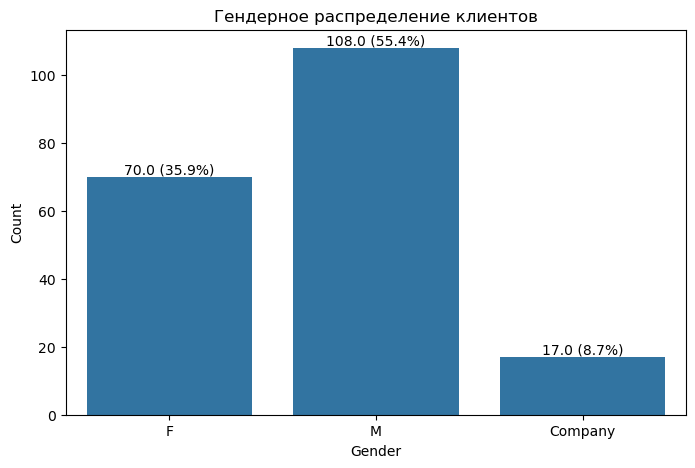

In [20]:
# создадим график
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='Gender')

# установим надписи
plt.title('Гендерное распределение клиентов')
plt.xlabel('Gender')
plt.ylabel('Count')

# рассчитаем общее количество клиентов
total_count = df['Gender'].count()  

# добавим надписи
for bar in ax.patches:
    height = bar.get_height()  # размер графиков
    percentage = (height / total_count) * 100  # рассчитаем проценты
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height} ({percentage:.1f}%)', 
            ha='center', va='bottom')  # добавим проценты над графиками

# выводим результаты
plt.show()

### Из гистограммы выше видно, что наибольшее количество клиентов, покупающих недвижимость - это мужчины.

### 4.2 Определим среднюю стоимость недвижимостью покупаемую клиентами разного пола

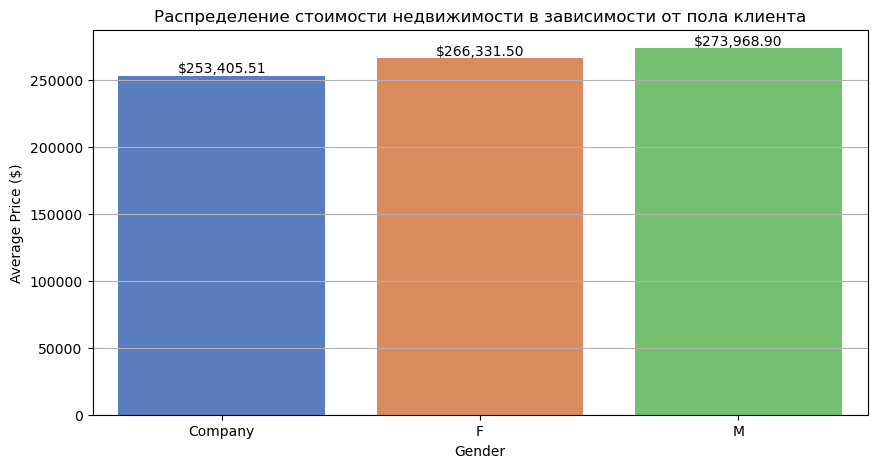

In [21]:
# преобразуем значения цены в числовые
# 1. удаляем знак доллара и запятые
# 2. преобразуем в float
df['Price'] = df['Price'].replace({r'\$': '', r',': ''}, regex=True).astype(float)



### построим диаграмму Bar Plot: распределение стоимости недвижимости в зависимости от пола клиента
plt.figure(figsize=(10, 5))
# вычислим среднюю стоимость недвижимости для каждого пола
average_price = df.groupby('Gender')['Price'].mean().reset_index()

# создадим диаграмму bar plot
ax = sns.barplot(data=average_price, x='Gender', y='Price', hue='Gender', palette='muted', legend=False)

# настроим графики
plt.title('Распределение стоимости недвижимости в зависимости от пола клиента')
plt.xlabel('Gender')
plt.ylabel('Average Price ($)')
plt.grid(axis='y')
plt.xticks(rotation=0)

# добавим размер цены над каждым графиком
for bar in ax.patches:
    height = bar.get_height()  # получаем высоту графика
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'${height:,.2f}', ha='center', va='bottom')

plt.show()

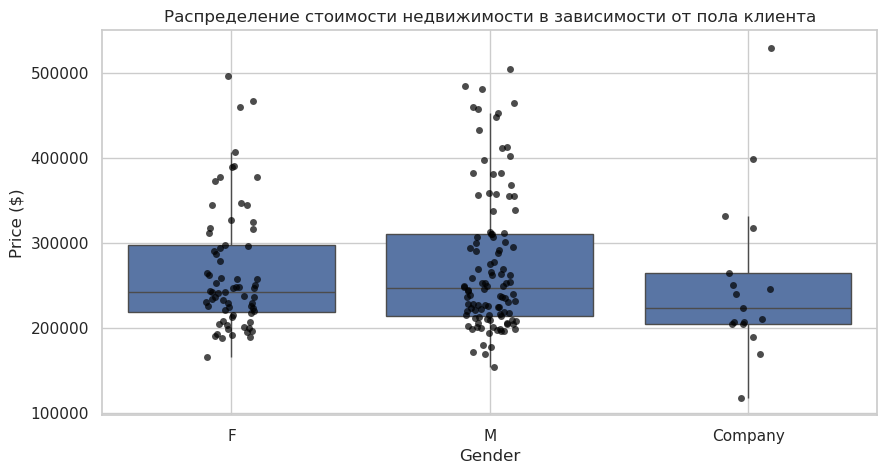

In [22]:
# устанавливаем стиль
sns.set(style="whitegrid")

### график Strip Plot над Box Plot
plt.figure(figsize=(10, 5))

# # построим ящик с усами, показывающий медиану, квартили и выбросы
sns.boxplot(data=df, x='Gender', y='Price', showcaps=False, showfliers=False)
# делаем наложение Box Plot с графиком strip plot
sns.stripplot(data=df, x='Gender', y='Price', color='black', alpha=0.7, jitter=True)
plt.title('Распределение стоимости недвижимости в зависимости от пола клиента')
plt.xlabel('Gender')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

### Как видим из графиков выше: основные клиенты - это мужчины и средняя стоимость (средний чек) покупки ими квартиры составляет 279,968 долларов США, что на 3% выше чем женщины и на 8% выше, чем юридические лица.

### 4.3 Определим распределение всех клиентов по возратным группам

In [23]:
# найдем распределение пользователей по возрастным группам
df['Age Interval '].value_counts()


Age Interval 
36-45      52
46-55      41
26-35      36
56-65      26
65+        18
Company    17
18-25       5
Name: count, dtype: int64

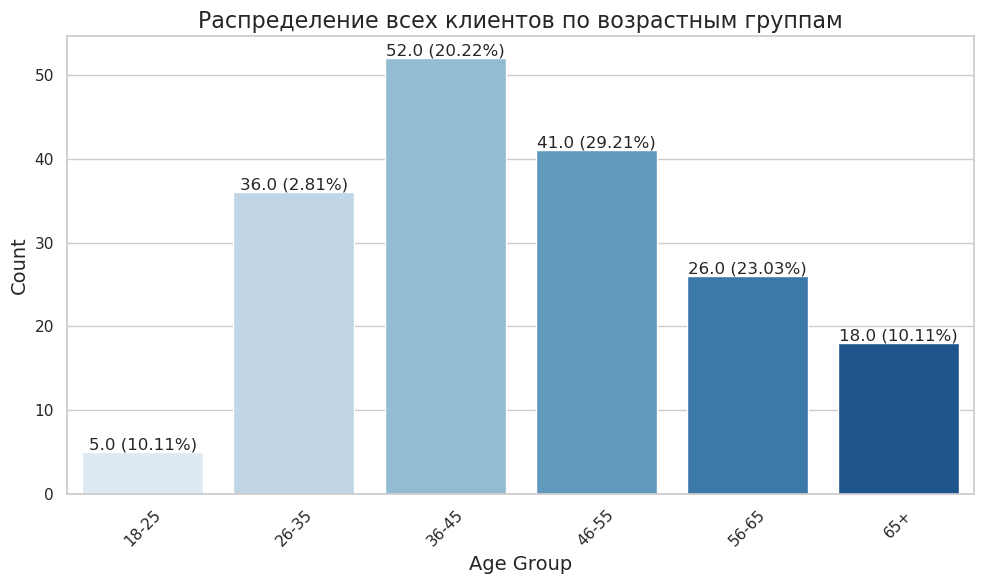

In [24]:
# построим гистограмму (bar chart) для распределения всех клиентов по возрастным группам
data_age = {
    'age_group': ['18-25','26-35', '36-45', '46-55', '56-65', '65+'],
    'count': [5, 36, 52, 41, 26, 18]
}

# создадим DataFrame
df_age = pd.DataFrame(data_age)

# посчитаем проценты от count
total_count = df_age['count'].sum()
df_age['percentage'] = (df_age['count'] / total_count) * 100

# установим стиль Seaborn 
sns.set(style='whitegrid')

# создадим bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='age_group', y='count', hue='age_group', data=df_age, palette='Blues', legend=False)

# добавим названия и подписи
plt.title('Распределение всех клиентов по возрастным группам', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)

# выведем график
plt.tight_layout()

# добавим значения и проценты над графиками
for bar in ax.patches:
    height = bar.get_height()  # высота графиков
    age_group_index = int(bar.get_x() // (bar.get_width() + 0.1))  # вычисление индекса age_group
    percentage = df_age['percentage'].iloc[age_group_index].round(2)  # получение процента
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height} ({percentage}%)', ha='center', va='bottom')

plt.show()

### Как видно из гистограммы выше, наибольшее количество клиентов (52) приходится на возрастную группу от 36 до 45 лет.

### 4.4 Определим в какой возрастной группе наиболее часто делают покупки мужчины

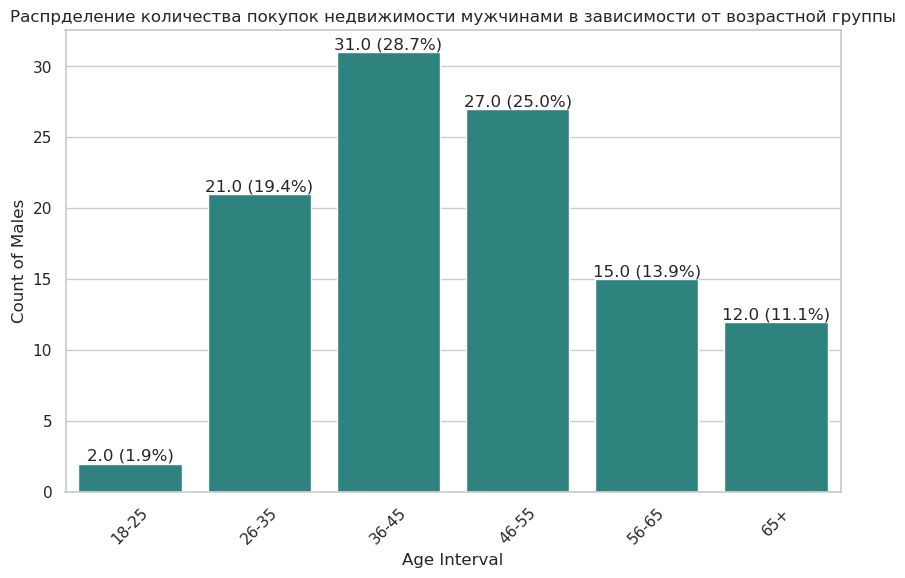

In [25]:
# удалим пробелы в названиях столбцов
df.columns = df.columns.str.strip()

# выделим мужиков 
male_df = df[df['Gender'] == 'M']

# рисуем гистограмму
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=male_df, x='Age Interval', hue='Gender', palette='viridis', legend=False)  # вставляем названия
plt.title('Распрделение количества покупок недвижимости мужчинами в зависимости от возрастной группы')
plt.xlabel('Age Interval')
plt.ylabel('Count of Males')
plt.xticks(rotation=45)

# общее количество мужичн-клиентов
total_males = len(male_df)

# добавляем число мужчин и их процент на график
for bar in ax.patches:
    height = bar.get_height()  #высота графика
    percentage = (height / total_males) * 100  # вычисляем процент
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height} ({percentage:.1f}%)', 
            ha='center', va='bottom')  # добавляем процент и числа на графики

plt.show()

### Как видно из гистограммы выше наибольшее количество покупок недвижимости (31) делают мужчины в возрастной группе от 36 до 45 лет.

### 4.5 Определим какой тип квартир предпочитают приобретать основные клиенты- мужчины

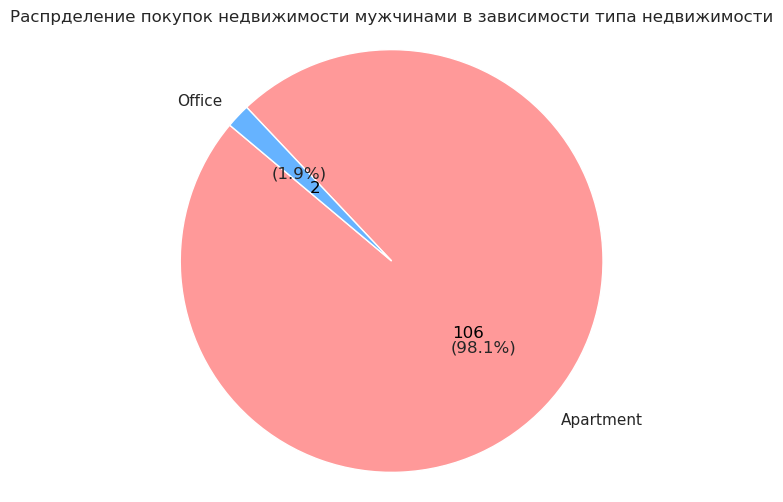

In [26]:
# выбираем в датасете мужиков
male_df_type = df[df['Gender'] == 'M']

# считаем количество мужчин для каждого вида недвижимости
male_counts = male_df_type['Type of property'].value_counts()

# определяем цветовой набор
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2']

# генерим круговую диаграмму
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(male_counts, 
                                    labels=male_counts.index, 
                                    autopct='',  # Disable built-in percentage labels
                                    startangle=140,
                                    colors=colors)

# добавляем значения к каждому сектору диаграммы
for i, wedge in enumerate(wedges):
    angle = (wedge.theta1 + wedge.theta2) / 2.0  # средний угол
    # определяем позиции  x и y 
    x = wedge.r * 0.5 * np.cos(np.deg2rad(angle))  # уточняем положение
    y = wedge.r * 0.5 * np.sin(np.deg2rad(angle))  # уточняем положение
    # Use iloc to access counts by position
    plt.text(x, y, f'{male_counts.iloc[i]}', ha='center', va='center', fontsize=12, color='black')

# добавляем проценты каждому сегменту 
for i, autotext in enumerate(autotexts):
       autotext.set_text(f'({male_counts.iloc[i] / male_counts.sum() * 100:.1f}%)')

plt.title('Распрделение покупок недвижимости мужчинами в зависимости типа недвижимости')
plt.axis('equal')  # Равное соотношение сторон гарантирует, что круговая диаграмма будет нарисована в виде круга.
plt.show()


### Как видно из круговой диаграммы выше, в 98,1% случаев клиенты-мужчины покупают тип недвижимости: апартаменты.

### 4.6 Опеределим площади квартир, которые наиболее востребованы среди покупателей мужчин

In [27]:
# выбыираем в датасете мужчин
male_df_type = df[df['Gender'] == 'M']
# группируем для мужчин востребованность недвижимости по площади
male_counts = male_df_type['Area (ft.)'].value_counts()
male_counts

Area (ft.)
781.07     10
798.28      9
923.21      7
733.19      5
785.48      5
649.80      4
1434.09     4
782.25      3
1109.25     3
794.52      3
747.50      2
827.87      2
1604.75     2
927.83      2
697.89      2
720.70      2
1127.76     2
723.93      2
756.21      2
701.66      2
720.81      2
927.08      1
1171.55     1
1137.44     1
587.28      1
1057.92     1
579.75      1
1396.86     1
736.63      1
1238.58     1
723.83      1
1615.29     1
1132.06     1
720.38      1
618.38      1
1128.40     1
928.16      1
1222.34     1
1203.29     1
1942.50     1
1479.72     1
790.54      1
649.69      1
1307.45     1
625.80      1
1110.32     1
1283.45     1
1160.36     1
717.05      1
1305.62     1
1596.35     1
1121.95     1
743.41      1
670.89      1
Name: count, dtype: int64

Средняя площадь (m²): 87.28
95% доверительный интервал: [81.78, 92.79]


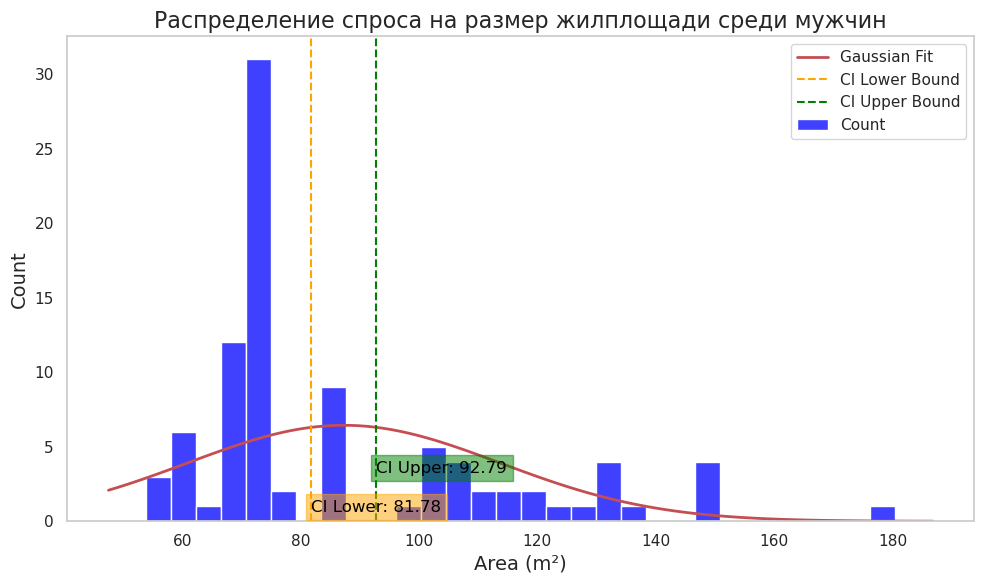

In [28]:

import seaborn as sns
from scipy import stats


# формируем массив из востребованности мужчинами площади недвижимости
data = {
    'Area (ft.)': [
        781.07, 781.07, 781.07, 781.07, 781.07, 781.07, 781.07, 781.07, 781.07, 781.07,
        798.28, 798.28, 798.28, 798.28, 798.28, 798.28, 798.28, 798.28, 798.28,
        923.21, 923.21, 923.21, 923.21, 923.21, 923.21, 923.21,
        733.19, 733.19, 733.19, 733.19, 733.19,
        785.48, 785.48, 785.48, 785.48, 785.48,
        649.80, 649.80, 649.80, 649.80,
        1434.09, 1434.09, 1434.09, 1434.09,
        782.25, 782.25, 782.25,
        1109.25, 1109.25, 1109.25,
        794.52, 794.52, 794.52,
        747.50, 747.50,
        827.87, 827.87,
        1604.75, 1604.75,
        927.83, 1171.55, 1137.44, 587.28, 1057.92, 579.75, 1396.86, 736.63, 1238.58, 723.83, 1615.29, 1132.06, 720.38, 618.38, 1128.40, 
        928.16, 1222.34, 1203.29, 1942.50, 1479.72, 790.54, 649.69, 1307.45, 625.80, 1110.32, 1283.45, 1160.36, 717.05, 1305.62, 1596.35,
        1121.95, 743.41, 670.89
             
    ]
}
# создадим датасет
df1 = pd.DataFrame(data)

# переведем футы в метры (1 ft² = 0.092903 m²)
area_m2 = df1['Area (ft.)'] * 0.092903

# вычислим среднее и стандартное отклонение
mean_area = area_m2.mean()
std_area = area_m2.std()
n = len(area_m2)

# вычислим 95% доверительный интервал 
confidence = 0.95
t_value = stats.t.ppf((1 + confidence) / 2, n - 1)  # указываем степень свободы
margin_of_error = t_value * (std_area / np.sqrt(n))
ci_lower = mean_area - margin_of_error
ci_upper = mean_area + margin_of_error

# выводим результаты доверительного интервала для площади
print(f"Средняя площадь (m²): {mean_area:.2f}")
print(f"95% доверительный интервал: [{ci_lower:.2f}, {ci_upper:.2f}]")

# строим гистограммы 
plt.figure(figsize=(10, 6))
sns.histplot(area_m2, bins=30, kde=False, color='blue', stat='count', label='Count')

# Fit нормального распрделения
mu, std = stats.norm.fit(area_m2)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)

# стоим гауссовский фит
plt.plot(x, p * len(area_m2) * (xmax - xmin) / 30, 'r', linewidth=2, label='Gaussian Fit')

# строим границы доверительного интервала
plt.axvline(ci_lower, color='orange', linestyle='--', label='CI Lower Bound')
plt.axvline(ci_upper, color='green', linestyle='--', label='CI Upper Bound')

# работаем с размещение текстовых надписей
plt.text(ci_lower, 0.02 * max(plt.ylim()), f'CI Lower: {ci_lower:.2f}', 
         color='black', fontsize=12, bbox=dict(facecolor='orange', alpha=0.5, edgecolor='orange'))
plt.text(ci_upper, 0.1 * max(plt.ylim()), f'CI Upper: {ci_upper:.2f}', 
         color='black', fontsize=12, bbox=dict(facecolor='green', alpha=0.5, edgecolor='green'))

# добавляем надписи
plt.title('Распределение спроса на размер жилплощади среди мужчин', fontsize=16)
plt.xlabel('Area (m²)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend()
plt.grid()

# выводим результат
plt.tight_layout()
plt.show()

#### Как видно из графика выше, наиболее востребованной среди мужчин является площадь апартаментов 87.28 м.кв. При этом нормальное распределение показывает, что основняая доля площади, покупаемой мужчинами, приходится на интервал от 87,78 до 92.79 м.кв, хотя на графике и по расчетам выше мы видим, что самый высокий спрос идет на квартиры площадью 72.5 м.кв. 

In [29]:
# находим максимальное значение площади, покупаемой клиентами-мужчинами
male_counts_max = male_df_type['Area (ft.)'].max()

# находим минимальное значение площади, покупаемой клиентами-мужчинами
male_counts_min = male_df_type['Area (ft.)'].min()

# находим среднее значение площади, покупаемой клиентами-мужчинами
male_counts_mean = male_df_type['Area (ft.)'].mean()
print (male_counts_max, male_counts_min, male_counts_mean) 

1942.5 579.75 918.4148148148148


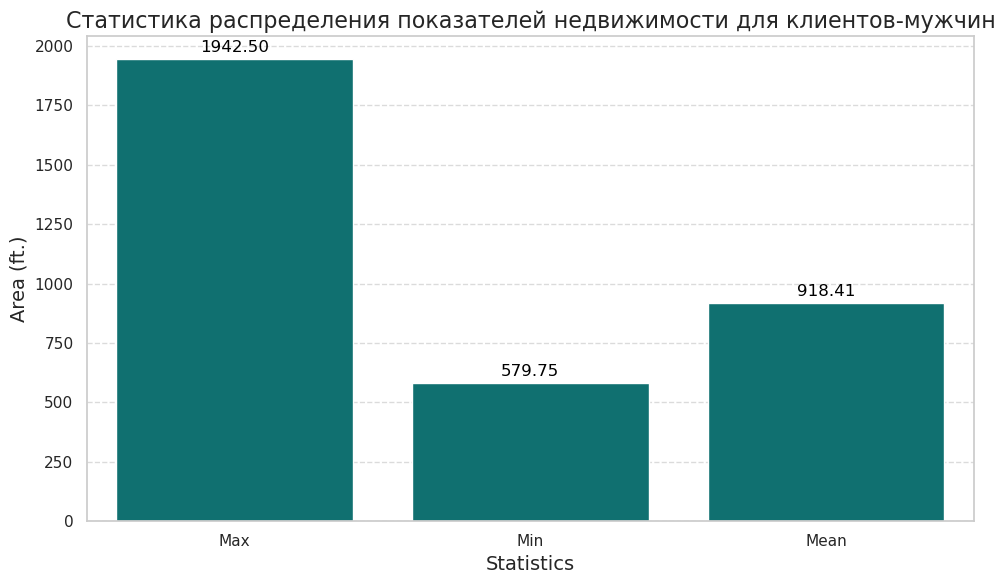

In [30]:
# создадим  DataFrame содержащий минимальные, максимальные и средние значения площадей
stats = pd.DataFrame({
    'Statistics': ['Max', 'Min', 'Mean'],
    'Value': [male_counts_max, male_counts_min, male_counts_mean]
})

# утстановим стиль
sns.set(style="whitegrid")

# создадим гистограмму
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Statistics', y='Value', data=stats, capsize=0.2, color='teal')

# добавим названия
plt.title('Статистика распределения показателей недвижимости для клиентов-мужчин', fontsize=16)
plt.xlabel('Statistics', fontsize=14)
plt.ylabel('Area (ft.)', fontsize=14)

# добавим значения к столбцам на диаграмме
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='baseline', 
                      fontsize=12, color='black', 
                      xytext=(0, 5), 
                      textcoords='offset points')

# добавим сетку на график
plt.grid(axis='y', linestyle='--', alpha=0.7)

# выводим результат
plt.tight_layout()
plt.show()

#### График выше показывает, что средняя площадь покупаемой недвижимости для клиентов-мужчин составляет 918,41 футов кв.

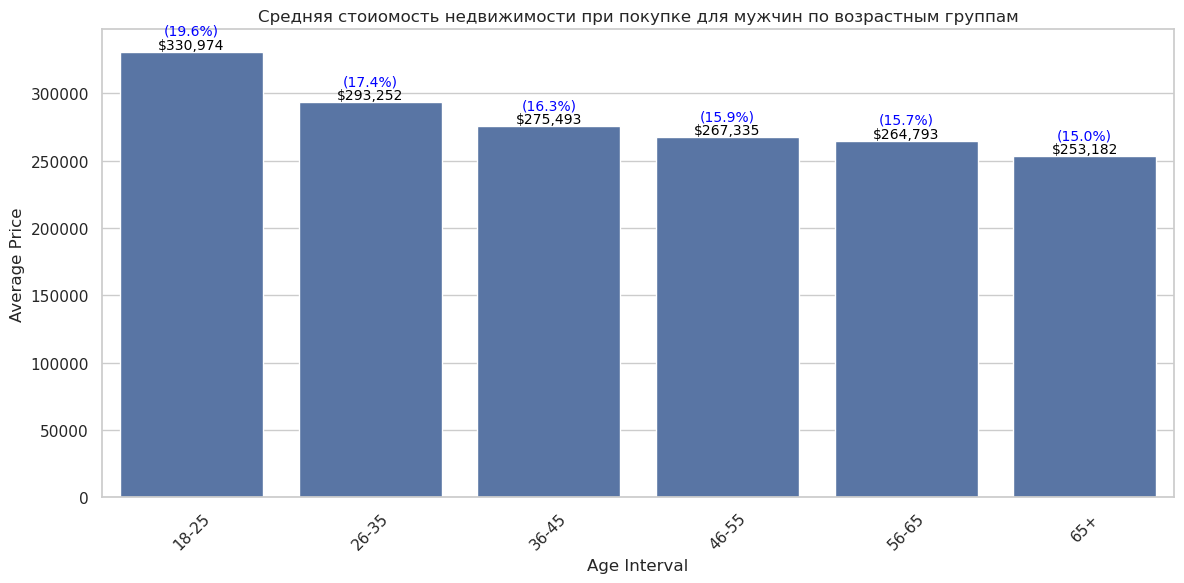

In [31]:
# преобразуем колонку 'Price' в числа
df['Price'] = df['Price'].replace({r'\$ ': '', r',': ''}, regex=True).astype(float)

# выбираем только мужчин
filtered_df = df[df['Gender'] == 'M']

# считаем среднюю стоимость покупки квартир для каждого возрастного интервала мужчин
average_price_by_age = filtered_df.groupby('Age Interval')['Price'].mean().reset_index()

# считаем общий средний объем продаж для мужчин в процентах
total_average_price = average_price_by_age['Price'].sum()

# создадим bar chart для средних стоимостей квартир по возрастным группа для мужчин
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=average_price_by_age, x='Age Interval', y='Price')

plt.title('Средняя стоиомость недвижимости при покупке для мужчин по возрастным группам')
plt.xlabel('Age Interval')
plt.ylabel('Average Price')

# процдемся по графикам с добавлением над ними значений и процентов
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'${height:,.0f}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', 
                fontsize=10, 
                color='black')

    # считаем проценты
    percentage = (height / total_average_price) * 100
    ax.annotate(f'({percentage:.1f}%)', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', 
                    fontsize=10, 
                    color='blue', 
                    xytext=(0, 10),  # Offset text a bit higher
                    textcoords='offset points')

# выводим результаты
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

#### Из графика выше видно, что самая высокая средняя стоимость недвижимости 330974 $  приходится на мужчин в возрастной категории 18-25 лет.

Проверим ниже, какая же возрастная категория мужчин тратит самые большие деньги на покупки недвижимости не в среднем, а по совокупности сделок. 

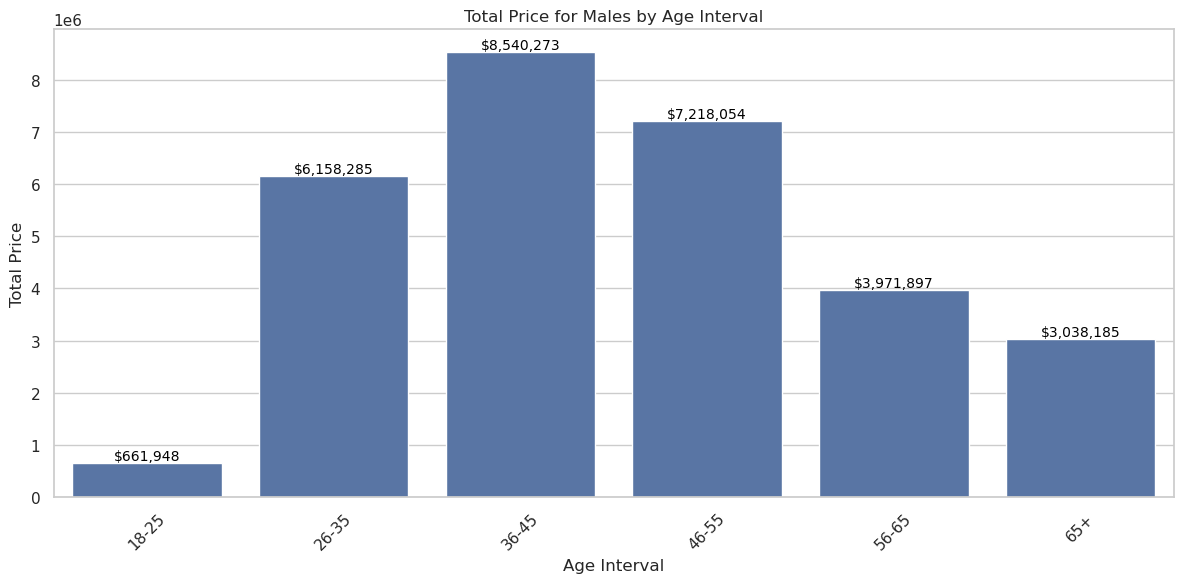

In [32]:
# преобразуем колонку 'Price' в числа
df['Price'] = df['Price'].replace({r'\$ ': '', r',': ''}, regex=True).astype(float)

# выбираем только мужчин
filtered_df = df[df['Gender'] == 'M']

# считаем суммарную стоимость покупки квартир для каждого возрастного интервала мужчин
sum_price_by_age = filtered_df.groupby('Age Interval')['Price'].sum().reset_index()

# создаем bar chart для суммарной цены для каждой возрастной группы
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=sum_price_by_age, x='Age Interval', y='Price')  # Removed the palette argument

# Cтроим график
plt.title('Total Price for Males by Age Interval')
plt.xlabel('Age Interval')
plt.ylabel('Total Price')

# добавляем значения на графики
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'${height:,.0f}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', 
                fontsize=10, 
                color='black')

# выводим результаты
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()  # Adjust layout for better fit
plt.show()

#### график выше показывает, что наибольшее количество денег при покупке недвижимости тратят клиенты-мужчины в возрастной категории 36-45 лет, что делает их в дальнейшем целевой группой для рассмотрения. 

### 4.7 Определим среднюю стоимость квартир и среднюю их площадь для клиентов-мужчин в возрасте 36-45 лет

In [33]:
#### почистим названия колонок от пробелов
df.columns = df.columns.str.strip()

# преобразуем колонку 'Price' в числа
df['Price'] = df['Price'].replace({r'\$ ': '', r',': ''}, regex=True).astype(float)

# отфильтруем дадасет по мужчинам в возрастном интервале '36-45'
filtered_df = df[(df['Gender'] == 'M') & (df['Age Interval'] == '36-45')]

# определим средние значения цены и площади квартир
mean_price = filtered_df['Price'].mean()
mean_area = filtered_df['Area (ft.)'].mean()

# выводим результат
print(f"Средняя стоимость квартир для мужчин в возрастной категории '36-45' составляет: {mean_price:.2f} $")
print(f"Средняя площадь квартир для мужчин в возрастной категории '36-45' составляет: {mean_area:.2f} ft.")

Средняя стоимость квартир для мужчин в возрастной категории '36-45' составляет: 275492.67 $
Средняя площадь квартир для мужчин в возрастной категории '36-45' составляет: 940.26 ft.


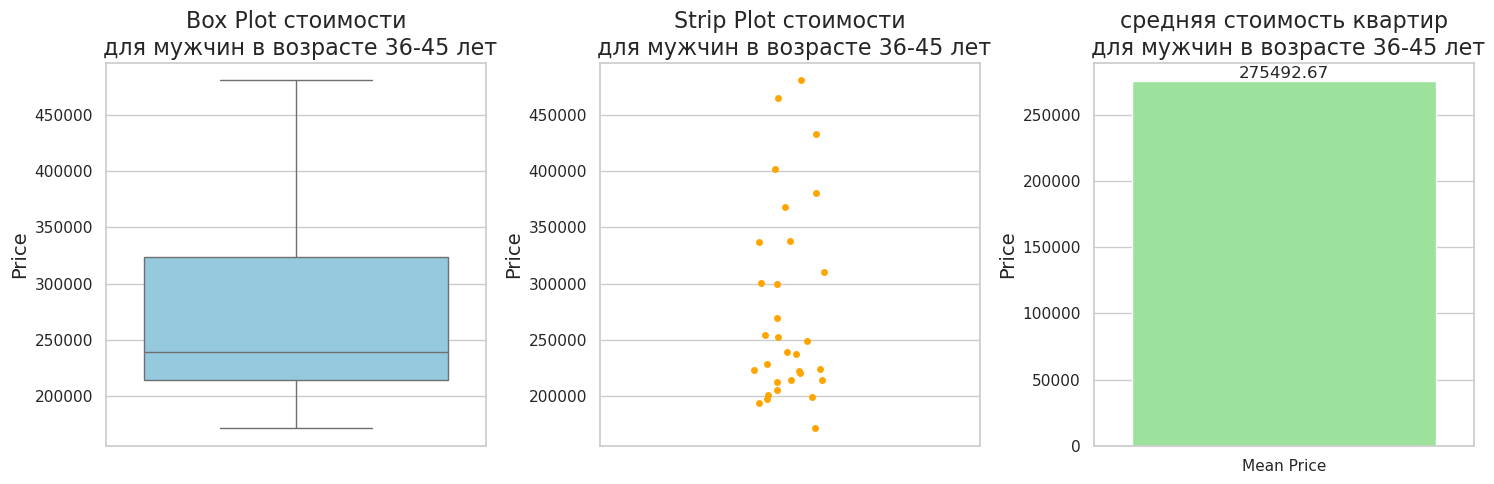

In [34]:
# достаем стоимости квартир
price = filtered_df['Price']

# определяем среднюю стоимость
mean_price = price.mean()

# устанавливаем размеры графиков
plt.figure(figsize=(15, 5))

# выводим Box plot
plt.subplot(1, 3, 1)
sns.boxplot(data=price, color='skyblue')
plt.title('Box Plot стоимости\n для мужчин в возрасте 36-45 лет', fontsize=16)
plt.ylabel('Price', fontsize=14)
plt.xticks([])  # убираем крестики

# выводим Strip plot
plt.subplot(1, 3, 2)
sns.stripplot(data=price, color='orange', size=5, jitter=True)
plt.title('Strip Plot стоимости\n для мужчин в возрасте 36-45 лет', fontsize=16)
plt.ylabel('Price', fontsize=14)
plt.xticks([])  # убираем крестики

# выводим Bar chart для средней стоимости 
plt.subplot(1, 3, 3)
sns.barplot(x=['Mean Price'], y=[mean_price], color='lightgreen')
plt.title('средняя стоимость квартир\n для мужчин в возрасте 36-45 лет', fontsize=16)
plt.ylabel('Price', fontsize=14)

# отражаем среднюю стоиомсть над графиком 
plt.text(0, mean_price, f'{mean_price:.2f}', ha='center', va='bottom', fontsize=12)

# выводим результаты
plt.tight_layout()
plt.show()

#### Графики выше показывают распределение стоимости квартир для клиентов мужчин в возрастной категории 36-45 лет. Средняя стоимость квартиры для клиентов-мужчин в возрастной категории 36-45 лет составляет 245492,67 $.


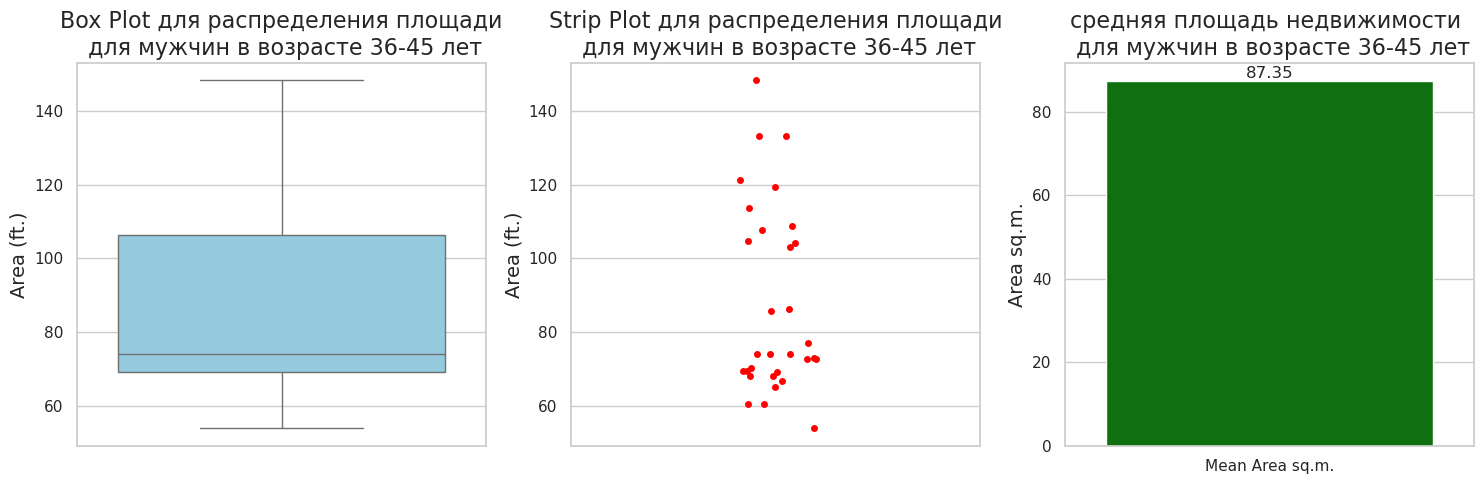

In [35]:
# поработаем с площадью 
# достаем площадь и датасета
area = filtered_df['Area (ft.)']

# переводим футы в метры квадратные
area_m2 = area * 0.092903

# определяем среднее занчение площади недвижимости
mean_area = area_m2.mean()

# устанавливаем размеры графиков
plt.figure(figsize=(15, 5))

# рисуем Box plot
plt.subplot(1, 3, 1)
sns.boxplot(data=area_m2, color='skyblue')
plt.title('Box Plot для распределения площади\n для мужчин в возрасте 36-45 лет', fontsize=16)
plt.ylabel('Area (ft.)', fontsize=14)
plt.xticks([])  # Hide x-ticks for clarity

# рисуем Strip plot
plt.subplot(1, 3, 2)
sns.stripplot(data=area_m2, color='red', size=5, jitter=True)
plt.title('Strip Plot для распределения площади\n для мужчин в возрасте 36-45 лет', fontsize=16)
plt.ylabel('Area (ft.)', fontsize=14)
plt.xticks([])  # Hide x-ticks for clarity

# рисуем Bar chart для средней площади
plt.subplot(1, 3, 3)
sns.barplot(x=['Mean Area sq.m.'], y=[mean_area], color='green')
plt.title('средняя площадь недвижимости \n для мужчин в возрасте 36-45 лет', fontsize=16)
plt.ylabel('Area sq.m.', fontsize=14)

# выводим среднее значение площади
plt.text(0, mean_area, f'{mean_area:.2f}', ha='center', va='bottom', fontsize=12)

# выводим результат
plt.tight_layout()
plt.show()

#### Графики выше показывают распределение площади недвижимости для клиентов мужчин в возрастной категории 36-45 лет. Средняя площадь недвижимости для клиентов-мужчин в возрастной категории 36-45 лет составляет 87,35 метров.кв.

### 4.8 Определение целей покупки для основной целевой группы мужчин в возрастной категории 36-45 лет.

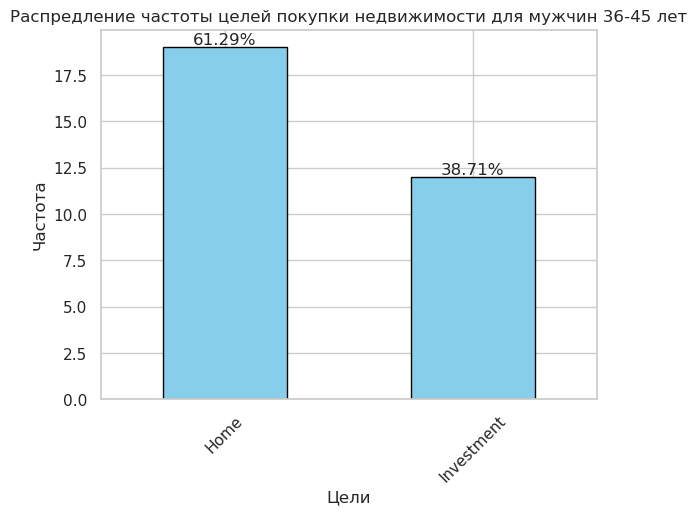

In [36]:
# отфильтруем дадасет по мужчинам в возрастном интервале '36-45'
filtered_df = df[(df['Gender'] == 'M') & (df['Age Interval'] == '36-45')]

# выведем цели покупки
purpose = filtered_df['Purpose']

# посчтиаем частоту целей
purpose_counts = purpose.value_counts()

# определим процентное соотношение целей покупки
purpose_percentages = (purpose_counts / purpose_counts.sum()) * 100

# выведем на график частоту целей покупок
ax = purpose_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Sдобавим проценты над графиком
for idx, patch in enumerate(ax.patches):  
    # получим соответствующий процент для каждой цели
    percentage = purpose_percentages.iloc[idx].round(2)  # используем iloc для индексации
    ax.text(patch.get_x() + patch.get_width() / 2, patch.get_height(),  
            f'{percentage:.2f}%',  
            ha='center', va='bottom')  
    
# выводим результат
plt.title('Распредление частоты целей покупки недвижимости для мужчин 36-45 лет')
plt.xlabel('Цели')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.show()

#### Как видим из графика выше, наша целевая группа мужчины в возрасте от 36 до 45 лет чаще всего (в 61.29% случаев)  покупают недвижимость в целях проживания. 

### 4.8 Посмотрим источник лида для нашей целевой группы (мужчины 36-45 лет)

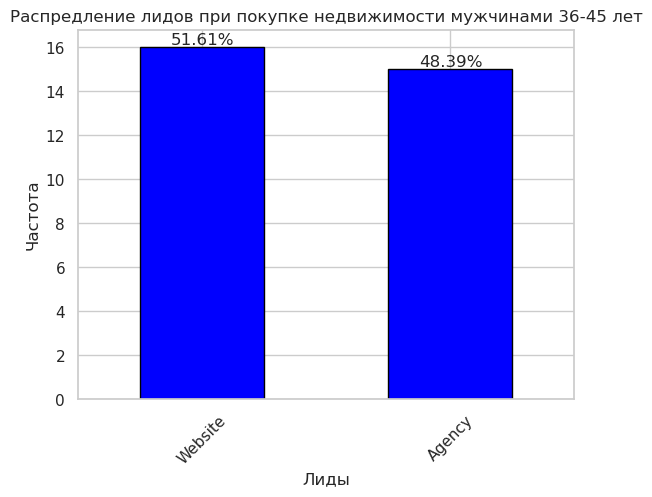

In [37]:
# выведем цели покупки
source = filtered_df['Source']

# посчтиаем частоту целей
source_counts = source.value_counts()

# определим процентное соотношение целей покупки
source_percentages = (source_counts / source_counts.sum()) * 100

# выведем на график частоту целей покупок
ax = source_counts.plot(kind='bar', color='blue', edgecolor='black')

# Sдобавим проценты над графиком
for idx, patch in enumerate(ax.patches):  
    # получим соответствующий процент для каждой цели
    percentage = source_percentages.iloc[idx].round(2)  # используем iloc для индексации
    ax.text(patch.get_x() + patch.get_width() / 2, patch.get_height(),  
            f'{percentage:.2f}%',  
            ha='center', va='bottom')  
    
# выводим результат
plt.title('Распредление лидов при покупке недвижимости мужчинами 36-45 лет')
plt.xlabel('Лиды')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.show()

#### Как видим из графика выше, наша целевая группа мужчины в возрасте от 36 до 45 лет чаще всего (в 51.61% случаев) получают информацию о недвижимости посредством интернет-сайтов. В то же время процент получения информации через агенстра также довольно высокий 48.39%.

## 5. Выводы

### Анализ данных показывает:
1. Основной целевой группой, приобретающей недвижимость являются мужчины, их 108, что составляет 55.4% от общего числа клиентов. На втором месте идут клиенты-женщины в 35.9% (70) случаев. На третьем - компании (юридические лица) в 8.7% (17) случаев. 
2.  Наиболее дорогую недвижимость также покупают мужчины. Их средний чек составляет  279,968 долларов США, что на 3% выше чем женщины и на 8% выше, чем юридические лица.
3.  В 98.1% (106) случаев клиенты-мужчины предпочитают покупать апартаменты (квартиры).
4.  Среди мужчин наибольшим спросом пользуется недвижимость площадью 72.5 м.кв., хотя доверительный интервал лежит в границах от 87,78 до 92.79 м.кв.
5. Среди мужчин наибольшее количество покупателей, а именно 28.7% (31), составляют мужчины в возрастной категории от 36 до 45 лет.
6. Клиенты мужчины в возрасте от 36 до 45 лет суммарно тратят наибольшую сумму на недвижимость 8,540,273 долларов США по сравнению с другими возрастными группами.
7. Мужчины в возрастной категории от 36 до 45 лет предпочитают  покупать апартаменты средней площадью  87,35 метров кв.
8. Основная цель покупки мужчинами в возрастной категории от 36 до 45 лет недвижимости является проживание (61,29%)
9. Основным источником лида при покупке мужчинами в возрастной категрии от 36 до 45 лет недвижимости является интернет-сайт (51,61%), но стоит отметить, что агенства также занимают высокую долю 48.39%, поэтому следует развивать и это направление. 